# 主题：多元统计分析
#### 参考教材：
* 应用多元统计分析。Wolfgang Hardle; Leopold Simar
* 实用多元统计分析。Richard A.Johnson; Dean W.Wichern

In [ ]:
#如果使用python，则需要先使用下面的命令
#%load_ext rpy2.ipython
# 而且，调用R时，前面都要加上“%%R”

## 第1章：批量数据比较
### 1.1 几种常见的图形

In [ ]:
# 导入数据
library(gdata)
data= read.xls("F:/python/R-project/mvstats.xls",sheet='d3.1',perl="C:\\Strawberry\\perl\\bin\\perl.exe",fileEncoding='utf-8',header=TRUE)#,stringsAsFactors=FALSE
# 另一种形式：data<- read.xls("F:/python/R-project/mvcase.xls",sheet=3,perl="C:\\Strawberry\\perl\\bin\\perl.exe",fileEncoding='utf-8')
row.names(data)=data$X
data=subset(data,select=-X)
tail(data)
summary(data)

##
barplot(apply(data,1,mean)) # 条形图
barplot(apply(data,2,mean))
barplot(apply(data,2,median))
#
pie(apply(data,2,mean))   # 饼图
#
boxplot(data)    # 箱形图
boxplot(data,horizontal=T)
#
stars(data,full=T) # 星相图 stars(data,full=TRUE,draw.segments=FALSE,...)。其中，full表示单个整体使用圆形还是半圆；draw.segments表示分支形状为圆形还是半圆
stars(data,full=F,draw.segments=T)
#
library(DescTools) # 脸谱图需要先加载DescTools包
PlotFaces(data)
#
library(andrews)  # 绘制调和曲线所需要的包
andrews(data)

## 第2章：矩阵代数

## 第3章：转向高维数据

## 第4章：多元分布

## 第5章：均值向量的推断与比较

## 第6章：估计理论与假设检验

## 第7章：多元线性回归模型

## 第8章：因子方法

## 第9章：判别与分类

In [ ]:
# 一个引子
wines <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",sep = ",")
colnames(wines)<-c('Class','Alcohol','Malic','Ash','Alcal','Mg','Phenol','Flav','Nonf','Proan','Color','Hue','Abs','Proline')
colors<-c('green','red','blue')[wines[,1]]
newwine<-cbind(jitter(as.integer(wines[,1])),wines[,-1])
names(newwine)[1]=names(wines)[1]
pairs(newwine,pch=16,cex=.3,gap=0,col=colors,xaxt='n',yaxt='n')

In [9]:
# 多项逻辑回归
require(nnet)
wines$Class<-as.factor(wines$Class)
wines$rClass=relevel(wines$Class,ref=2)
winelogit=multinom(rClass~Alcohol+Ash+Alcal+Abs+Proline,data=wines,maxit=200)
print(ws<-summary(winelogit),digits=4)
tratio<-ws$coefficients/ws$standard.errors
print(2*(1-pt(abs(tratio),df=ws$edf)),digits=4)

Loading required package: nnet


# weights:  21 (12 variable)
initial  value 195.552987 
iter  10 value 38.789908
iter  20 value 20.100843
iter  30 value 17.180767
iter  40 value 16.286691
iter  50 value 13.857030
iter  60 value 13.727827
iter  70 value 13.569620
iter  80 value 13.543034
iter  90 value 13.521774
iter 100 value 13.465942
iter 110 value 13.439976
iter 120 value 13.418083
iter 130 value 13.405035
iter 140 value 13.394287
iter 150 value 13.360739
iter 160 value 13.351303
iter 170 value 13.330023
final  value 13.325689 
converged
Call:
multinom(formula = rClass ~ Alcohol + Ash + Alcal + Abs + Proline, 
    data = wines, maxit = 200)

Coefficients:
  (Intercept) Alcohol    Ash   Alcal    Abs  Proline
1     -124.00   6.213 22.849 -3.3478 10.354 0.029383
3      -46.46   2.927  6.192  0.3032 -7.483 0.005955

Std. Errors:
  (Intercept) Alcohol    Ash  Alcal    Abs  Proline
1      0.1139  1.6304 0.1403 1.0161 0.2612 0.032351
3      0.3588  0.4539 2.8564 0.2566 1.8766 0.003968

Residual Deviance: 26.65138 
AIC: 5

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



G,x1,x2,G1
1,-1.9,3.2,雨
1,-6.9,0.4,雨
1,5.2,2.0,雨
1,5.0,2.5,雨
1,7.3,0.0,雨
1,6.8,12.7,雨


Call:
lda(G ~ x1 + x2)

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
     x1   x2
1  0.92 2.10
2 -0.38 8.85

Coefficients of linear discriminants:
          LD1
x1 -0.1035305
x2  0.2247957

,G,LD1,newG
1,1,-0.28674901,1
2,1,-0.39852439,1
3,1,-1.29157053,1
4,1,-1.15846657,1
5,1,-1.95857603,1
6,1,0.94809469,2
7,1,-2.50987753,1
8,1,-0.47066104,1
9,1,-1.06586461,1
10,1,-0.06760842,1


   newG
G   1 2
  1 9 1
  2 1 9

[1] 0.9

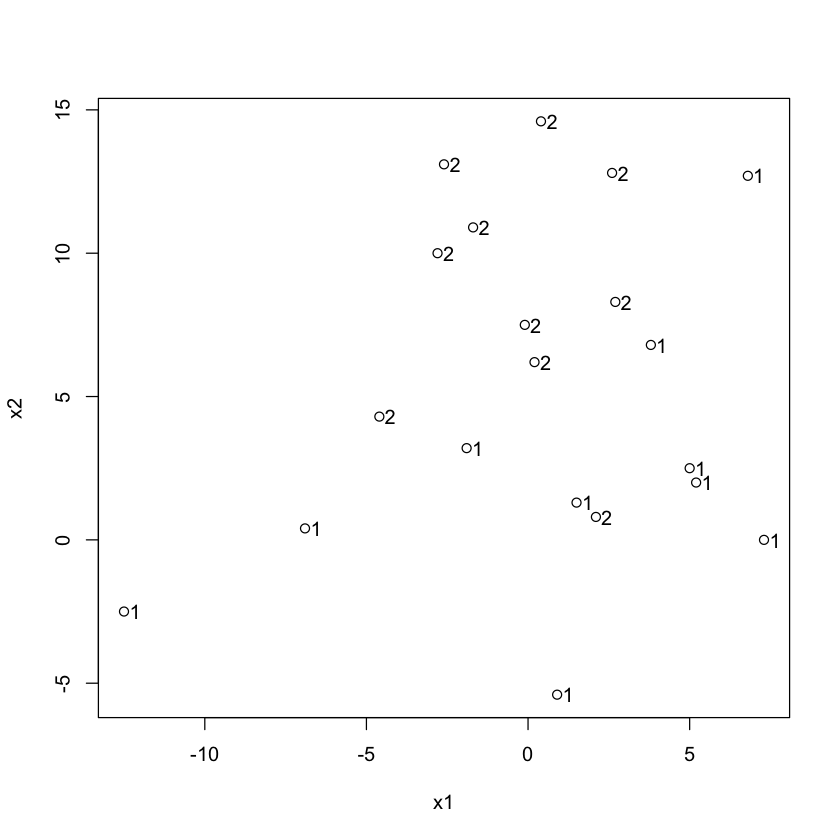

In [8]:
# 线性判别分析1
library(gdata)
#data= read.xls("F:/python/R-project/mvstats.xls",sheet='d6.1',perl="C:\\Strawberry\\perl\\bin\\perl.exe",fileEncoding='utf-8',header=TRUE)#,stringsAsFactors=FALSE
data= read.xls("/Users/harbes/python/R-project/mvstats.xls",sheet='d6.1',fileEncoding='utf-8',header=TRUE)#,stringsAsFactors=FALSE
head(data)
#
attach(data)
plot(x1,x2);text(x1,x2,G,adj=-0.5)

#
library(MASS)
(ld=lda(G~x1+x2))
Z=predict(ld)
newG=Z$class
cbind(G,Z$x,newG)
(tab=table(G,newG)) # 注意，外面加一个括号，会print结果
sum(diag(prop.table(tab)))

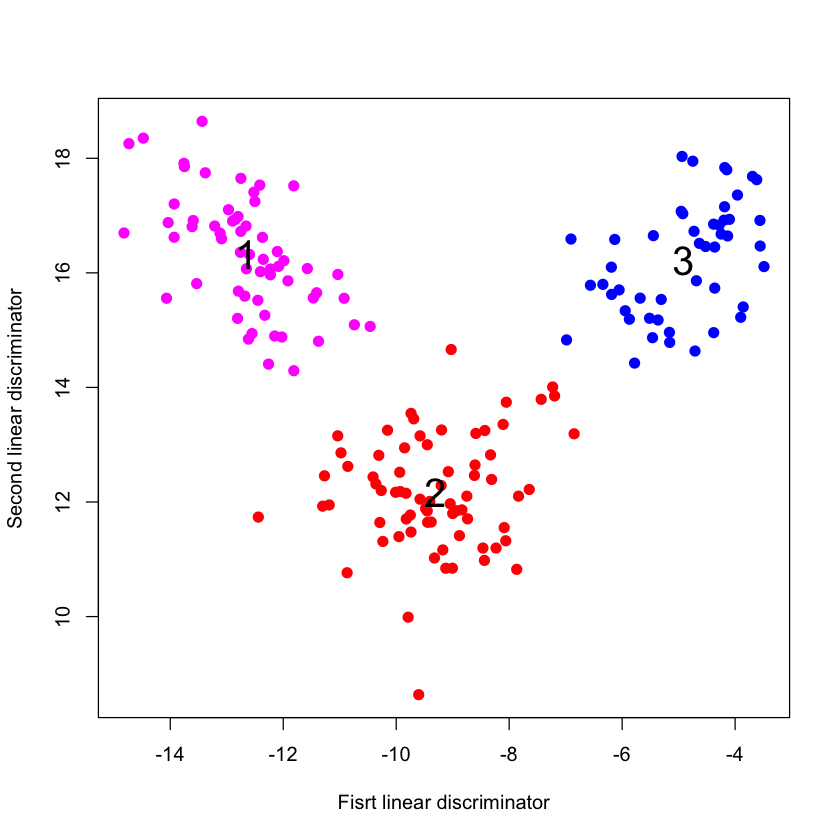

In [7]:
# 线性判别分析2
wines <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",sep = ",")
colnames(wines)<-c('Class','Alcohol','Malic','Ash','Alcal','Mg','Phenol','Flav','Nonf','Proan','Color','Hue','Abs','Proline')
library(MASS)
ld<-lda(Class~.,data=wines)
loading<-as.matrix(wines[,2:14])%*%ld$scaling
plot(loading,col=c(6,2,4)[wines[,1]],pch=16,cex=1.25,xlab='Fisrt linear discriminator',ylab='Second linear discriminator')
# 给每一类添加标记
for (i in 1:3){
    centx<-mean(loading[wines[,1]==i,][,1])
    centy<-mean(loading[wines[,1]==i,][,2])
    text(centx,centy,i,cex=2)
              }

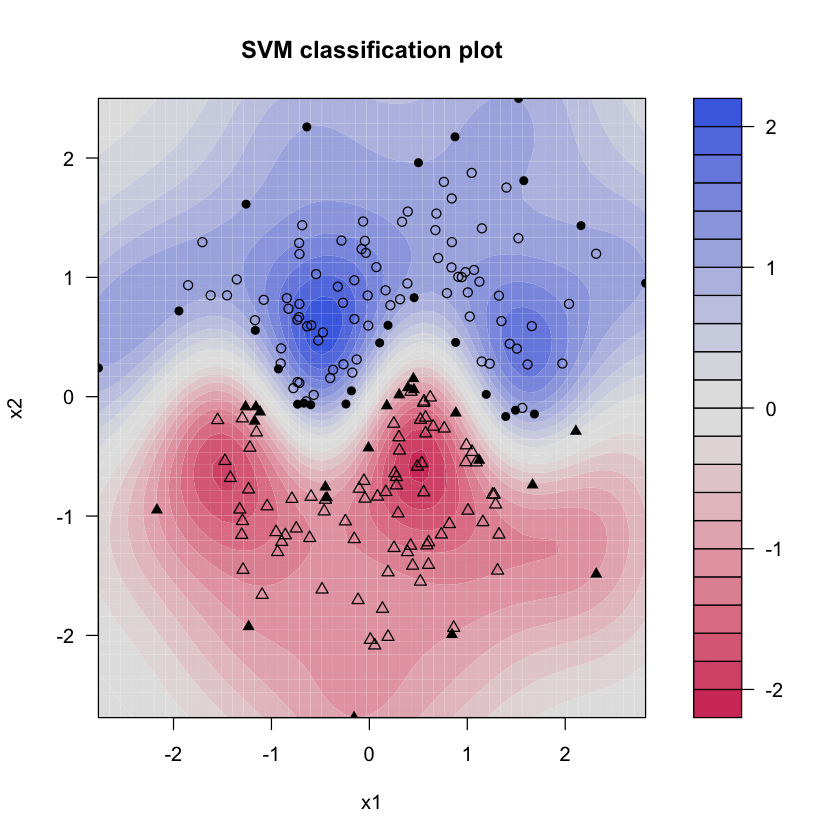

In [5]:
#支持向量机
library(kernlab)
library(mvtnorm)
x<-rmvnorm(n=250,mean=c(0,0),sigma=matrix(c(1,0.1,0.1,1),2,2))
wavy<-sin(pi*x[,1])/2
include<-(abs(wavy-x[,2])>0.25)
x<-x[include,]
wavy<-wavy[include]
group<-1+(x[,2]>wavy)
all<-data.frame(x=x[,c(2,1)],group=group)
colnames(all)<-c('x2','x1','group')
sv<-ksvm(group~.,data=all,type='C-svc')
plot(sv,data=all)

In [ ]:
## 回归树
library(MASS)
data(crabs)
#crabs[c(1,51,101,151),]
group<-1+2*(crabs[,1]=='0')+(crabs[,2]=='F')
groupch=c('B','b','O','o')[group]
cg<-cbind(crabs,group,groupch)
#cg[c(1,51,101,151),]
library(mvpart)
crabtree<-mvpart(groupch~FL+RW+CL+CW+BD,data=cg,method='class',size=7)

## 第10章：聚类

## 其他

In [ ]:
wines

In [ ]:
circlize::chordDiagram(matrix(sample(10), 
                              nrow = 2, ncol = 5))